In [2]:
# First, we'll import pandas, a data processing and CSV file I/O library
import pandas as pd

# We'll also import seaborn, a Python graphing library
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)
%matplotlib inline

In [5]:
# Next, we'll load the NZ migration dataset, which is in the "../input/" directory
# Import the data set into a pandas data set
migr = pd.read_csv('../input/migration_nz/migration_nz.csv.zip', compression='zip')

In [13]:
# Let's see what's in the migration data
migr.head()

,Measure,Country,Citizenship,Year,Value
0,Arrivals,Oceania,New Zealand Citizen,1979,11817.0
1,Arrivals,Oceania,Australian Citizen,1979,4436.0
2,Arrivals,Oceania,Total All Citizenships,1979,19965.0
3,Arrivals,Antarctica,New Zealand Citizen,1979,10.0
4,Arrivals,Antarctica,Australian Citizen,1979,0.0


In [19]:
migr.columns

Index(['Measure', 'Country', 'Citizenship', 'Year', 'Value'], dtype='object')

In [73]:
# Now we need to take a look at what 
net_ann_migr = migr[migr['Measure'] == 'Net'].groupby(['Year', 'Measure']).sum()

In [78]:
net_ann_migr.reset_index().head()

,Year,Measure,Value
0,1979,Net,-247456.0
1,1980,Net,-152151.0
2,1981,Net,-120100.0
3,1982,Net,-38203.0
4,1983,Net,29837.0


In [87]:
# Index for pandas Series
net_ann_migr.index.levels[0]

Int64Index([1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
            1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
            2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
            2012, 2013, 2014, 2015, 2016],
           dtype='int64', name='Year')

In [92]:
ser = pd.Series(net_ann_migr['Value'].values, index = net_ann_migr.index.levels[0])

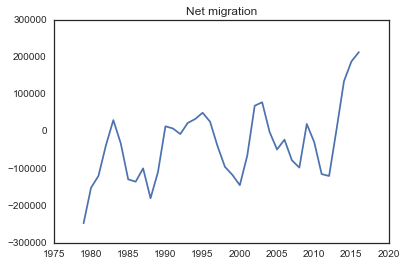

In [99]:
# Can finally plot the series
plt.plot(ser)
plt.title('Net migration')